In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df_index = pd.read_csv("economic_index.csv")

In [10]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [11]:
## Drop unnecessary column's 
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [12]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [13]:
## Check Null VAlues
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

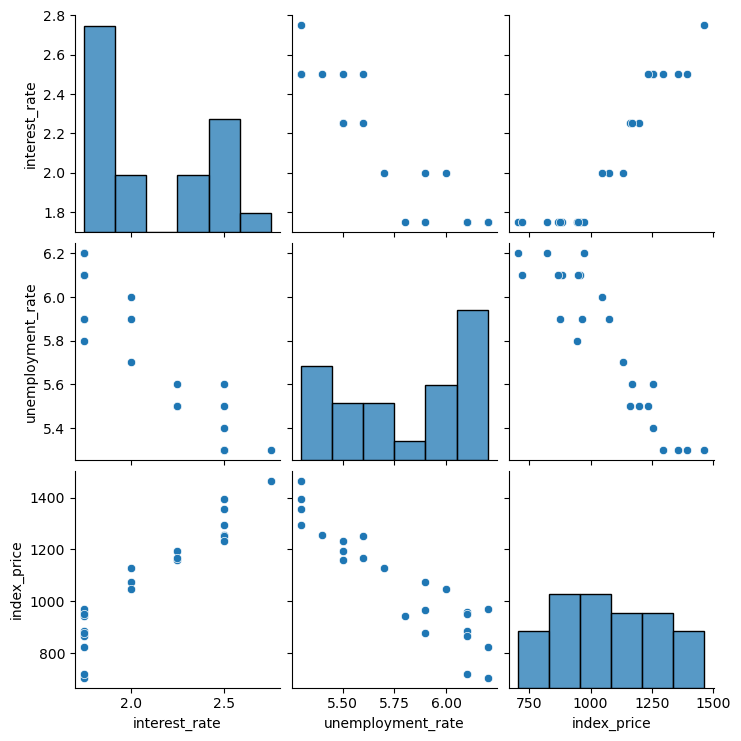

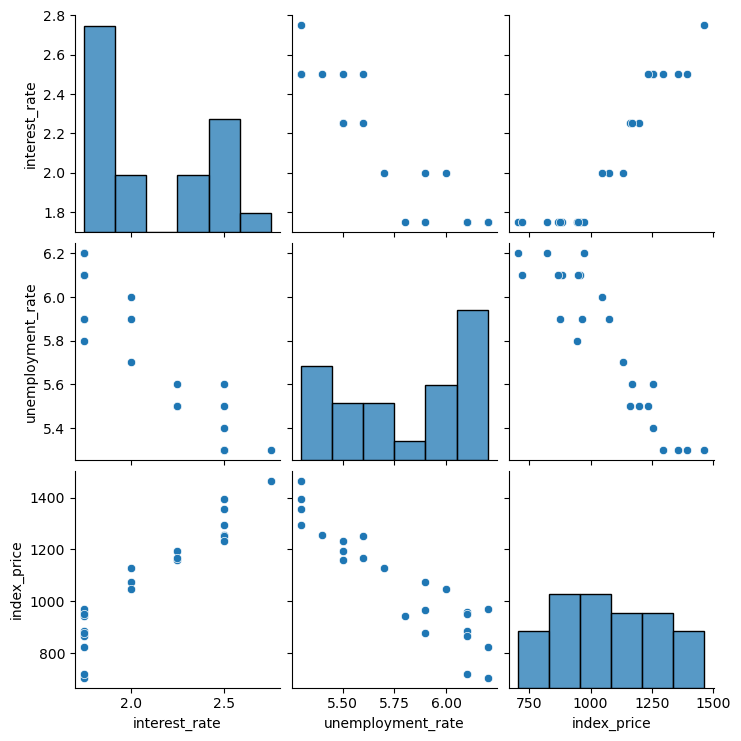

In [20]:
## Lets  do some Visulization
import seaborn as sns
sns.pairplot(df_index)
plt.show()

In [21]:
df_index.corr()## it's print the corelation 

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


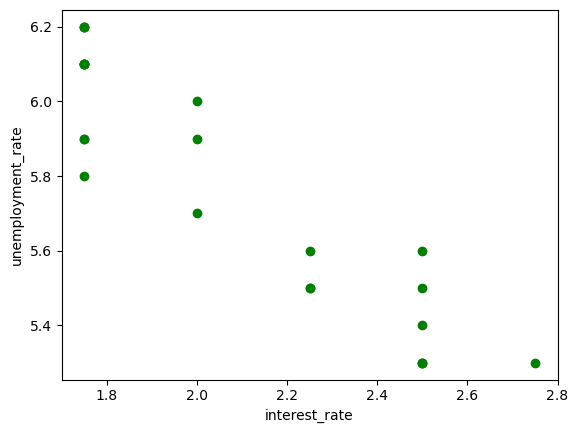

In [24]:
## Visualizaion and datappoint more closely
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"],color="green")
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")
plt.show()

In [28]:
## INdependent and dependent features 
X=df_index.iloc[:,:-1]## here represent the [:]first and second columns and the :-1 is represent the remove the last index
y=df_index.iloc[:,-1]## here the : is the last columns and the -1 is represent select the last column

In [29]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [30]:
## here print the y
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [31]:
## Train test split 
from sklearn.model_selection import train_test_split

In [102]:
## x and y train and test split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [103]:
import seaborn as sns
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'],color='green')##it's plot data in a linear regression momdel fit
## regplot  accept the positional arguments .it expects keyword argument like this

<Axes: xlabel='interest_rate', ylabel='index_price'>

In [104]:
sns.regplot(x='interest_rate',y='index_price',data=df_index)#it's plot data in a linear regression momdel fit

<Axes: xlabel='interest_rate', ylabel='index_price'>

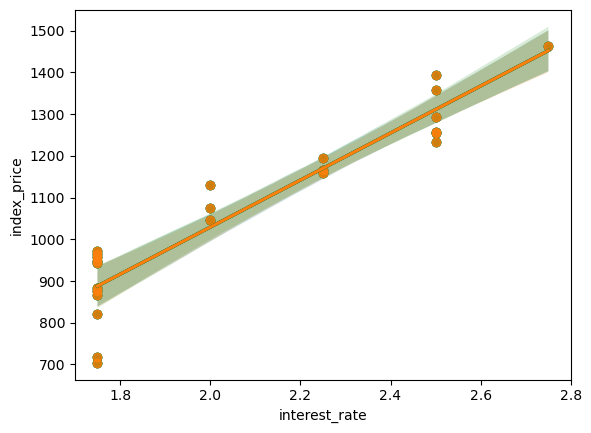

In [105]:
plt.show()

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [108]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [109]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [110]:
regression.fit(X_train,y_train)

LinearRegression()

In [111]:
#C ross validation check for the regression model and get the validation score
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=3)

In [112]:
np.mean(validation_score)

-5914.828180162396

In [113]:
## Prediction 
y_pred=regression.predict(X_test)

In [114]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [115]:
## PErformence Metrix 
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [116]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rms=np.sqrt(mse)
print("Mean Squered Error is:-",mse)
print("Mean absolute Error is:-",mae)
print("Root Mean Squered Error:-",rms)

Mean Squered Error is:- 8108.567426306611
Mean absolute Error is:- 73.80444932337099
Root Mean Squered Error:- 90.04758423359624


In [117]:
#Assumption  

In [118]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


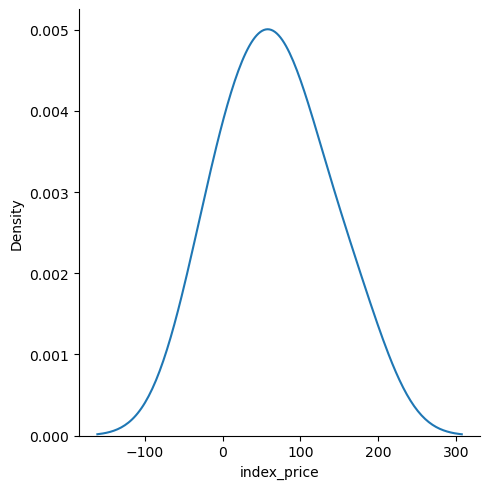

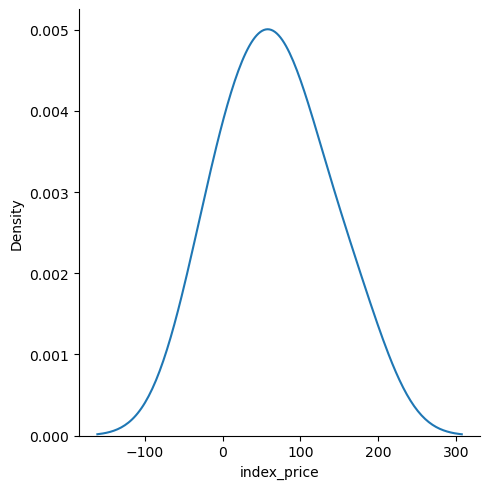

In [120]:
## plot Residuals 
sns.displot(residuals,kind='kde')
plt.show()

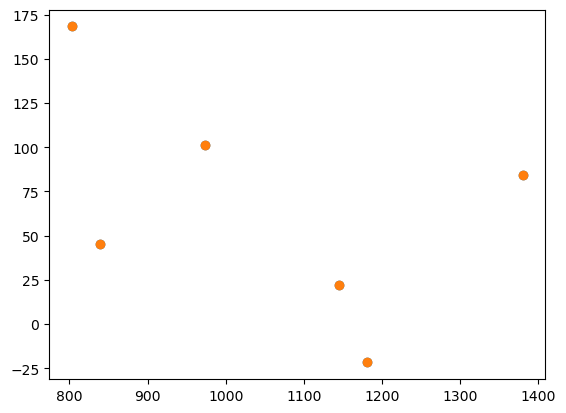

In [122]:
## Sctter plot with respect to prediction and residules
plt.scatter(y_pred,residuals)
plt.show()

In [126]:
## OLS Linear Regression model
